# Tieteellinen laskenta, 18.11.22, Demot 4
Johannes Rajala


In [12]:
import numpy as np
import cmath as cm
from math import pi, cos, sin
import random
import matplotlib.pyplot as plt
import scipy

### Tehtävä 1
#### a)

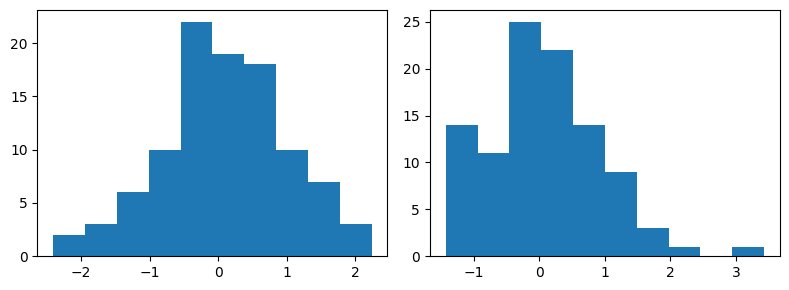

In [50]:
U = [np.cos(2*np.pi*random.random()) * np.sqrt(-2*np.log(random.random())) for i in range (100)]
V = [np.sin(2*np.pi*random.random()) * np.sqrt(-2*np.log(random.random())) for i in range (100)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axes[0].hist(U)
axes[1].hist(V)
fig.tight_layout()

In [38]:
print(f"The mean U: {np.mean(U)}, the std of U: {np.std(U)} \nThe mean of V: {np.mean(V)}, the std of V: {np.std(V)}")

The mean U: -0.01703524978497619, the std of U: 1.0241728999770703 
The mean of V: 0.196668848990113, the std of V: 0.9119306530613926


#### b)

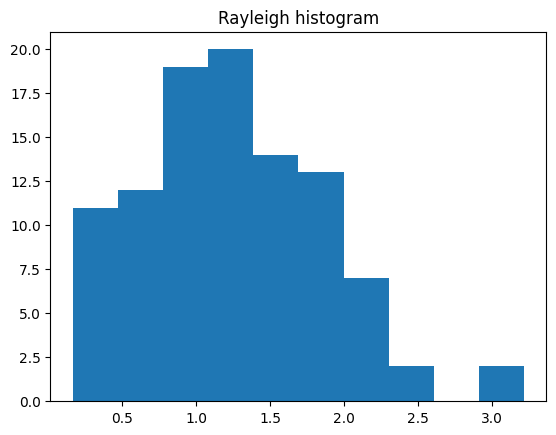

In [43]:
R = [np.sqrt(U[i]**2 + V[i]**2) for i in range(100)]
plt.hist(R)
plt.title("Rayleigh histogram")
fig.tight_layout()

### Tehtävä 2

In [160]:
n = 4
c = [random.random() for i in range(n)]
d = [1 + 3*random.random() for i in range(n)]

def function(x,n=n, c=c, d=d):
    sum = 0
    for i in range(n):
        sum = sum + c[i]*(1 + np.sin(d[i]*x))
    return(sum)

In [167]:
def monte_carlo(myfunction, samples_x, samples_y, a, b):
    M = np.ceil(np.max([myfunction(random.uniform(a,b)) for i in range(100000)])) + 1 # ceiling + 1 of the max of the function in the [a,b] interval
    x_space = np.linspace(a, b, samples_x) # tarkastellaan funktion arvoja tasaisesti [a,b] vöillä
    y_space = np.linspace(0, M, samples_y) # tarkastellaan mikä osuus pisteistä [0, M] völillä on pienempiä kuin funktion arvo tässä pisteessä
    portion = []
    summa = 0
    counter = 0
    
    # Iteroidaan gridin X, Y yli ja lasketaan osuus pisteissä y, jotka ovat funktion alapuolella
    for x in x_space:
        for y in y_space:
            if(myfunction(x) > y):
                summa=summa+1
            else:
                break
                           
    return((b-a)*(M)*summa/(samples_x*samples_y)) # alapuolelle jääneiden pisteiden osuus kerrottuna tarkasteluikkunan pinta-alalla

In [173]:
def tarkka_arvo(a,b,c,d):
    arvo = (b-a)*sum(c) + sum( [(c[i]/d[i]) * (np.cos(d[i]*a) - np.cos(d[i]* b)) for i in range(len(c))] )
    return arvo

tarkka = tarkka_arvo(0,1,c,d)

In [174]:
for i in [100, 1000]:
    print(f"Kun i on {i}, Monte-Carlo virhe on: {np.abs(monte_carlo(function, i, i, 0, 1) - tarkka)}")

Kun i on 100, Monte-Carlo virhe on: 0.010972319613987036
Kun i on 1000, Monte-Carlo virhe on: 0.0009123196139868561


### Tehtävä 3

In [224]:
asciiDict = {i: chr(i) for i in range(65,91)} # Alustetaan ascii kirjasto AAKKOSISTA
asciiDict_reverse = {chr(i): i for i in range(65,91)} # Alustetaan ascii kirjasto AAKKOSISTA toisin päin
to_decipher1 = ['N', 'L', 'O', 'G', 'J', 'G', 'Y', 'Y', 'N', 'M', 'J', 'O', 'N', 'C', 'H']
to_decipher2 = ['E', 'N', 'F', 'V', 'Y', 'N', 'T', 'B', 'R', 'F', 'P', 'U', 'V', 'A', 'N']


In [201]:
print(asciiDict)
print(asciiDict_reverse)

{65: 'A', 66: 'B', 67: 'C', 68: 'D', 69: 'E', 70: 'F', 71: 'G', 72: 'H', 73: 'I', 74: 'J', 75: 'K', 76: 'L', 77: 'M', 78: 'N', 79: 'O', 80: 'P', 81: 'Q', 82: 'R', 83: 'S', 84: 'T', 85: 'U', 86: 'V', 87: 'W', 88: 'X', 89: 'Y', 90: 'Z'}
{'A': 65, 'B': 66, 'C': 67, 'D': 68, 'E': 69, 'F': 70, 'G': 71, 'H': 72, 'I': 73, 'J': 74, 'K': 75, 'L': 76, 'M': 77, 'N': 78, 'O': 79, 'P': 80, 'Q': 81, 'R': 82, 'S': 83, 'T': 84, 'U': 85, 'V': 86, 'W': 87, 'X': 88, 'Y': 89, 'Z': 90}


In [222]:
def shift(i, to_decipher):
    shiftattu = [(asciiDict_reverse.get(character)+i) for character in to_decipher] # haetaan kirjaimia vastaavat kokonaisluvut
    temp_keys = []
    for number in shiftattu:
        if(number > 90):
            temp_keys.append(number-90+64) # Jos luku on yli 90, skaalataan se takaisin välille [65,90]
        else:
            temp_keys.append(number)
    
    return [asciiDict.get(i) for i in temp_keys] # haetaan skaalattuja numeroita vastaavat kirjaimet

In [226]:
for i in range(1,26):
    shiftattu = shift(i, to_decipher1)
    print(f"Shiftattuna {i}:llä sana on: {shiftattu}")

Shiftattuna 1:llä sana on: ['O', 'M', 'P', 'H', 'K', 'H', 'Z', 'Z', 'O', 'N', 'K', 'P', 'O', 'D', 'I']
Shiftattuna 2:llä sana on: ['P', 'N', 'Q', 'I', 'L', 'I', 'A', 'A', 'P', 'O', 'L', 'Q', 'P', 'E', 'J']
Shiftattuna 3:llä sana on: ['Q', 'O', 'R', 'J', 'M', 'J', 'B', 'B', 'Q', 'P', 'M', 'R', 'Q', 'F', 'K']
Shiftattuna 4:llä sana on: ['R', 'P', 'S', 'K', 'N', 'K', 'C', 'C', 'R', 'Q', 'N', 'S', 'R', 'G', 'L']
Shiftattuna 5:llä sana on: ['S', 'Q', 'T', 'L', 'O', 'L', 'D', 'D', 'S', 'R', 'O', 'T', 'S', 'H', 'M']
Shiftattuna 6:llä sana on: ['T', 'R', 'U', 'M', 'P', 'M', 'E', 'E', 'T', 'S', 'P', 'U', 'T', 'I', 'N']
Shiftattuna 7:llä sana on: ['U', 'S', 'V', 'N', 'Q', 'N', 'F', 'F', 'U', 'T', 'Q', 'V', 'U', 'J', 'O']
Shiftattuna 8:llä sana on: ['V', 'T', 'W', 'O', 'R', 'O', 'G', 'G', 'V', 'U', 'R', 'W', 'V', 'K', 'P']
Shiftattuna 9:llä sana on: ['W', 'U', 'X', 'P', 'S', 'P', 'H', 'H', 'W', 'V', 'S', 'X', 'W', 'L', 'Q']
Shiftattuna 10:llä sana on: ['X', 'V', 'Y', 'Q', 'T', 'Q', 'I', 'I', 'X',

In [225]:
for i in range(1,26):
    shiftattu = shift(i, to_decipher2)
    print(f"Shiftattuna {i}:llä sana on: {shiftattu}")

Shiftattuna 1:llä sana on: ['F', 'O', 'G', 'W', 'Z', 'O', 'U', 'C', 'S', 'G', 'Q', 'V', 'W', 'B', 'O']
Shiftattuna 2:llä sana on: ['G', 'P', 'H', 'X', 'A', 'P', 'V', 'D', 'T', 'H', 'R', 'W', 'X', 'C', 'P']
Shiftattuna 3:llä sana on: ['H', 'Q', 'I', 'Y', 'B', 'Q', 'W', 'E', 'U', 'I', 'S', 'X', 'Y', 'D', 'Q']
Shiftattuna 4:llä sana on: ['I', 'R', 'J', 'Z', 'C', 'R', 'X', 'F', 'V', 'J', 'T', 'Y', 'Z', 'E', 'R']
Shiftattuna 5:llä sana on: ['J', 'S', 'K', 'A', 'D', 'S', 'Y', 'G', 'W', 'K', 'U', 'Z', 'A', 'F', 'S']
Shiftattuna 6:llä sana on: ['K', 'T', 'L', 'B', 'E', 'T', 'Z', 'H', 'X', 'L', 'V', 'A', 'B', 'G', 'T']
Shiftattuna 7:llä sana on: ['L', 'U', 'M', 'C', 'F', 'U', 'A', 'I', 'Y', 'M', 'W', 'B', 'C', 'H', 'U']
Shiftattuna 8:llä sana on: ['M', 'V', 'N', 'D', 'G', 'V', 'B', 'J', 'Z', 'N', 'X', 'C', 'D', 'I', 'V']
Shiftattuna 9:llä sana on: ['N', 'W', 'O', 'E', 'H', 'W', 'C', 'K', 'A', 'O', 'Y', 'D', 'E', 'J', 'W']
Shiftattuna 10:llä sana on: ['O', 'X', 'P', 'F', 'I', 'X', 'D', 'L', 'B',

### Tehtävä 4
#### a)

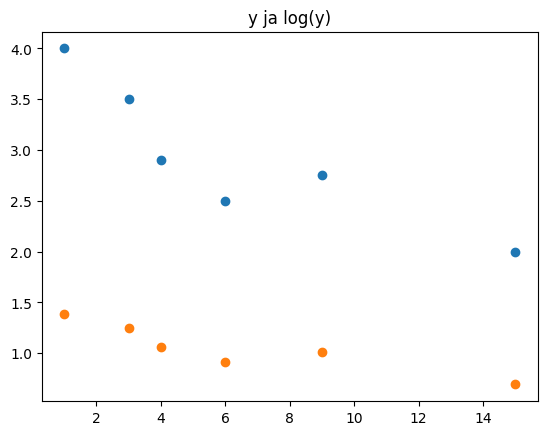

In [283]:
x = [1,3,4,6,9,15]
x_vakio = [1 for i in range(len(x))]
y = [4, 3.5, 2.9, 2.5, 2.75, 2]

plt.scatter(x,y)
plt.scatter(x,np.log(y))
plt.title("y ja log(y)")
fig.tight_layout()

#### b)

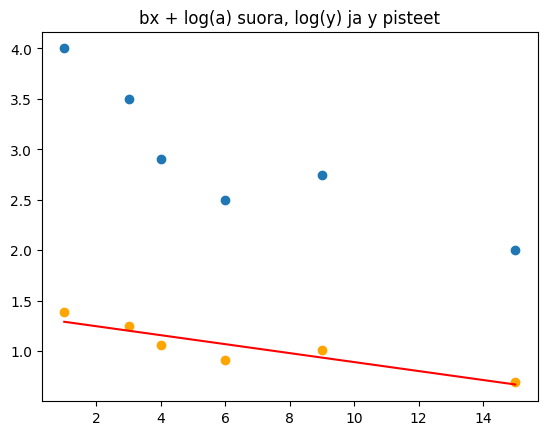

In [316]:
design = list(map(list, zip(*[x,x_vakio]))) # designmatriisi
design_transpose = [x, x_vakio]  # ja sen tranpoosi

beta_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(design_transpose, design)), design_transpose), np.log(y)) # (X^t X)^-1 X^t y := pienimmän neliösumman menetelmällä saadut kulmakerroin ja vakiotermi
y_hat = [beta_hat[0]*i + beta_hat[1] for i in x]

plt.scatter(x, np.log(y), c = "orange")
plt.scatter(x,y)
plt.plot(x, y_hat, c = "red")
plt.title("bx + log(a) suora, log(y) ja y pisteet")
fig.tight_layout()

In [314]:
print(f"Pienimmän neliösumman menetelmällä saadun suoran kulmakerroin b={beta_hat[0]} ja log(a)={beta_hat[1]}.")

Pienimmän neliösumman menetelmällä saadun suoran kulmakerroin b=-0.04440568420342053 ja log(a)=1.335370481741708.


#### c)

In [306]:
print(f"x(i)  y(i)           Y(i)            a*exp(b*x(i))      y(i) - a*exp(b*x(i))")
for i in range(6):
    print(f" {x[i]}    {y[i]}      {np.log(y[i])}   {np.exp(beta_hat[1])*np.exp(beta_hat[0]*x[i])}    {y[i] - (np.exp(beta_hat[1])*np.exp(beta_hat[0]*x[i]))}")  

x(i)  y(i)           Y(i)            a*exp(b*x(i))      y(i) - a*exp(b*x(i))
 1    4      1.3862943611198906   3.636293150583949    0.3637068494160509
 3    3.5      1.252762968495368   3.3272742628842966    0.17272573711570338
 4    2.9      1.0647107369924282   3.1827568173572525    -0.28275681735725255
 6    2.5      0.9162907318741551   2.912280282383641    -0.4122802823836409
 9    2.75      1.0116009116784799   2.5490463884417913    0.20095361155820868
 15    2      0.6931471805599453   1.9528409674276646    0.047159032572335446


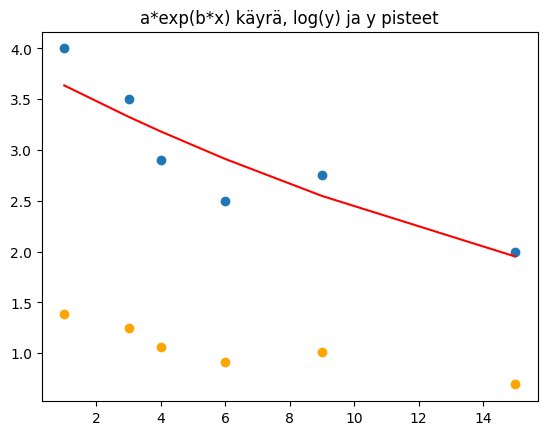

In [313]:
plt.scatter(x, y)
plt.scatter(x, np.log(y), c = "orange")
y_hat_exp = [np.exp(beta_hat[1])*np.exp(beta_hat[0]*x[i]) for i in range(6)]
plt.plot(x, y_hat_exp, c = "red")
plt.title("a*exp(b*x) käyrä, log(y) ja y pisteet")
fig.tight_layout()

In [317]:
print(f"Pienimmän neliösumman menetelmällä saadun käyrän kulmakerroin exp(b)={np.exp(beta_hat[0])} ja a={np.exp(beta_hat[1])}.")

Pienimmän neliösumman menetelmällä saadun käyrän kulmakerroin exp(b)=0.956565815106036 ja a=3.8014040363556827.


### Tehtävä 5

### Tehtävä 6